# Introduction
In this Data Story there will be an investigation on if there is a relationship between the Human Development Index (HDI) and the Gender Sucide ratio. The HDI is an internationally used index to measure the quality of life of a person in a certain country. The quality of life can be described simply as how livable a country is for an average person living in a country. Variables of this index are, among other things, life expectancy, education, healthcare and gross national income per capita. Men commit on average 3,9 times more suicide then woman worldwide, but this varies per country. We are specifically interested if a higher HDI leads to a more evenly distributed gender suicide ratio. We will also take a look at the Gender Development Index (GDI).The The GDI measures the index of the equality between the HDI for men and women. So if the HDI for men and women is almost equal, then de GDI is close to 1. With this extra variable we can also look if the GDI has a effect on the gender suicide ratio. In this data story, there will be worked with 2 perspectives. The first perspective is that a increase of the HDI will lead to a more balanced gender suicide ratio. the second is that a increase in the HDI doesn't have any influence on the gender suicide ratio. With this Data Story we hope to get a better insight in the relation between the development of a country, the development of gender and the gender suicide ratio.

# Preprocessing


Database 1 contains information about suicides in each country, as for men and women for every year between 1987 and 2016.  It would seem logical to filter for the year 2015, since this year is used in the other databases. However, the registered amount of countries for that year is only 62, which is why we have chosen to compare for the year 2013, which has 80 registered countries. The data that we are interested in (suicides/100k civilians) is categorized in a certain age group, year, and country. Male and female suicides are also separated. Based on these qualifications, two separate datasets are constructed, one male, and one female. The mean suicides/100k is then calculated for both datasets, and added as a column. Then, the male and female datasets are merged together into one, also including a male-female suicide ratio (suicides/100k male / suicides/100k female).

Database 2 contains data of 185 countries, revolved around the Human Development Index (HDI)  of each country, measured in 2015 specifically. The HDI is a value between 0 and 1 (low-high) that indicates human development by looking at health, education, and standard of living. The database contains each variable that is considered for the HDI value, but we are only interested in the HDI values themselves. Thus, as for preprocessing, all columns except the country and its HDI value are removed.

Database 3 is in terms of data-context identical to the first one, yet it revolves around the Gender Development Index (GDI), instead of the HDI. The GDI is also a value between 0 and 1 (low-high), that indicates equality in human development specifically between male and female. To clarify, the higher the gender equality, the higher the GDI value will be. Similarly to the preprocessing of database one, will all rows except the country and its GDI value be removed. Finally, dataset 2 and 3 are merged together based on their shared countries. Rows that include one or more ‘empty’ values are removed from the dataset.

Database 4 contains the HDI values for 189 countries for each year from 1990 to 2019. As we are interested specifically in the HDI values for each country from the year 2013 (based on the argumentation above in dataset 1, all other years are filtered out. This database is then merged with database 2 to form a separate dataset. This dataset will be used to prove why the HDI values of 2015 can be compared with the suicide statistics of 2013, as the difference between the HDI values of 2013 and 2015 are insignificant. 

Datasets 1-4 are finally merged into one based on their shared country, which results in a dataset with 70 countries.





# 4 nearly finished visualizations

Mitch & Julian

In [1]:
# pip install matplotlib 2

In [2]:
# pip install seaborn

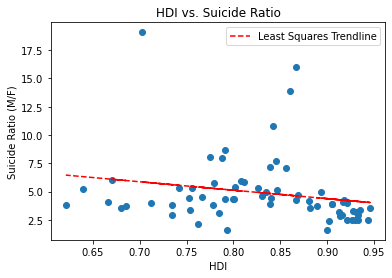

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('databases/FINAL DATASET.csv')
hdi = df['HDI 2013']
suicide_ratio = df['Suicide Ratio (M/F)']


# Convert to NumPy arrays
hdi = np.array(hdi)
suicide_ratio = np.array(suicide_ratio)

# Exclude NaN and inf values
valid_indices = np.isfinite(hdi) & np.isfinite(suicide_ratio)
hdi = hdi[valid_indices]
suicide_ratio = suicide_ratio[valid_indices]

# Calculate mean values
mean_hdi = np.mean(hdi)
mean_suicide_ratio = np.mean(suicide_ratio)

# Calculate the least squares regression line
A = np.vstack([hdi, np.ones(len(hdi))]).T
m, c = np.linalg.lstsq(A, suicide_ratio, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(hdi, suicide_ratio)

# Adding the least squares trendline
plt.plot(hdi, m * hdi + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('HDI')
plt.ylabel('Suicide Ratio (M/F)')
plt.title('HDI vs. Suicide Ratio')

# Adding legend
plt.legend()

# Display the
plt.show()

The chart compares the relationship between the HDI and the Suicide Ratio.  The x-axis represents the HDI. The scale ranges from 0.6 to 0.95 because all the values of the HDI lie between these values. The y-axis represents the Suicide Ratio. It indicates the ratio of male/female suicides. The scale ranges from 0 to 20 so that all the data points can be shown. In this chart you can make out that the higher the HDI is, the lower the suicide ratio is.

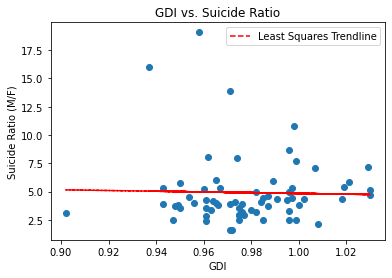

In [3]:
gdi = df['GDI 2015']
suicide_ratio = df['Suicide Ratio (M/F)']


# Convert to NumPy arrays
gdi = np.array(gdi)
suicide_ratio = np.array(suicide_ratio)

# Exclude NaN and inf values
valid_indices = np.isfinite(gdi) & np.isfinite(suicide_ratio)
gdi = gdi[valid_indices]
suicide_ratio = suicide_ratio[valid_indices]

# Calculate mean values
mean_gdi = np.mean(gdi)
mean_suicide_ratio = np.mean(suicide_ratio)


# Calculate the least squares regression line
A = np.vstack([gdi, np.ones(len(gdi))]).T
m, c = np.linalg.lstsq(A, suicide_ratio, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(gdi, suicide_ratio)

# Adding the least squares trendline
plt.plot(gdi, m * gdi + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('GDI')
plt.ylabel('Suicide Ratio (M/F)')
plt.title('GDI vs. Suicide Ratio')

# Adding legend
plt.legend()

plt.show()

The chart compares the relationship between the GDI and the Suicide Ratio. The x-axis represents the GDI. The scale ranges from 0.9 to 1.04 because all the values of the HDI lie between these values. The y-axis represents the Suicide Ratio. It indicates the ratio of male/female suicides. The scale ranges from 0 to 20 so that all the data points can be shown. In this chart, there is a slight relation between the GDI and suicide ratio; the higher the GDI, the lower the suicide ratio. Though, this relationship is not at all strong.

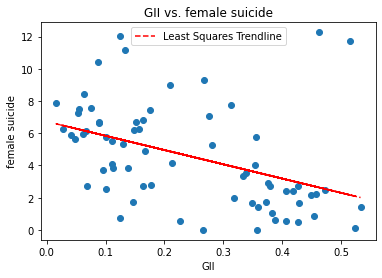

In [4]:
gii = df['GII 2015']
female_suicide = df['suicides/100k female']


# Convert to NumPy arrays
gii = np.array(gii)
female_suicide = np.array(female_suicide)

# Exclude NaN and inf values
valid_indices = np.isfinite(gii) & np.isfinite(female_suicide)
gii = gii[valid_indices]
female_suicide = female_suicide[valid_indices]

# Calculate mean values
mean_gii = np.mean(gii)
mean_female_suicide = np.mean(female_suicide)


# Calculate the least squares regression line
A = np.vstack([gii, np.ones(len(gii))]).T
m, c = np.linalg.lstsq(A, female_suicide, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(gii, female_suicide)

# Adding the least squares trendline
plt.plot(gii, m * gii + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('GII')
plt.ylabel('female suicide')
plt.title('GII vs. female suicide')

# Adding legend
plt.legend()

plt.show()

The chart compares the relationship between the GII and the Female Suicide. The x-axis represents the GII. The scale ranges from 0 to around 0.55, because all the values of the GII lie between these values. The y-axis represents the female suicide. It indicates the amount of female suicides. The scale ranges from 0 to 12 so that all the data points can be shown. In this chart you can make out that the higher the GII is, the lower the female suicide is.

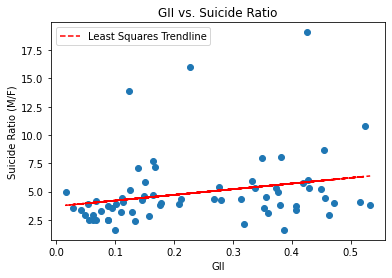

In [5]:
gii = df['GII 2015']
suicide_ratio = df['Suicide Ratio (M/F)']


# Convert to NumPy arrays
gii = np.array(gii)
suicide_ratio = np.array(suicide_ratio)

# Exclude NaN and inf values
valid_indices = np.isfinite(gii) & np.isfinite(suicide_ratio)
gii = gii[valid_indices]
suicide_ratio = suicide_ratio[valid_indices]

# Calculate mean values
mean_gii = np.mean(gii)
mean_suicide_ratio = np.mean(suicide_ratio)

# Calculate the least squares regression line
A = np.vstack([gii, np.ones(len(gii))]).T
m, c = np.linalg.lstsq(A, suicide_ratio, rcond=None)[0]

# Plotting the scatter plot
plt.scatter(gii, suicide_ratio)

# Adding the least squares trendline
plt.plot(gii, m * gii + c, color='r', linestyle='--', label='Least Squares Trendline')

# Adding labels and title
plt.xlabel('GII')
plt.ylabel('Suicide Ratio (M/F)')
plt.title('GII vs. Suicide Ratio')

# Adding legend
plt.legend()

plt.show()

The chart compares the relationship between the HDI and the Suicide Ratio.  The x-axis represents the GII. The scale ranges from 0 to around 0.55, because all the values of the GII lie between these values. The y-axis represents the Suicide. It indicates the ratio of male/female suicides. The scale ranges from 0 to 20 so that all the data points can be shown. In this chart you can make out that the higher the GII is, the higher the suicide ratio is; the higher the inequality, the less the equality between male and female suicides. 

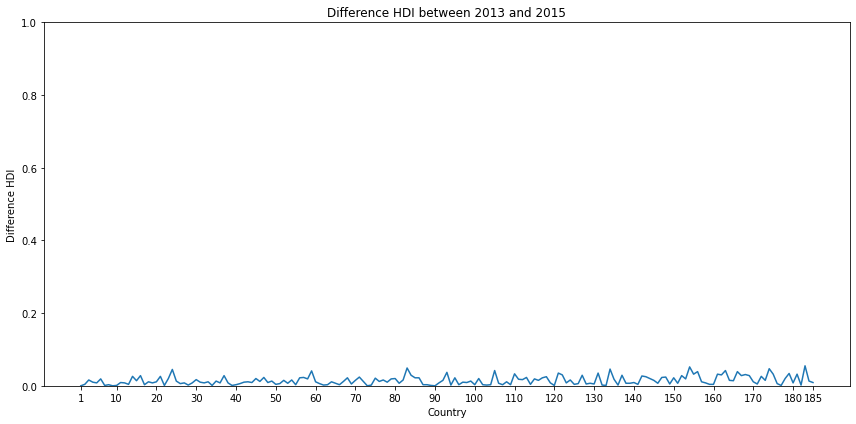

In [6]:

# Read the CSV file
data = pd.read_csv('databases/hdi_year_comparison.csv')

# Create a new DataFrame with the required columns
df = data[['Country', 'HDI 2015', 'HDI 2013']]

# Calculate the absolute difference between the two values
df['Difference'] = np.abs(df['HDI 2015'] - df['HDI 2013'])

# Convert columns to NumPy arrays
height_diff = df['Difference'].values

# Generate country numbers
country_numbers = np.arange(1, len(df) + 1)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot a line for the difference without markers
plt.plot(country_numbers, height_diff)

plt.xlabel('Country')
plt.ylabel('Difference HDI')
plt.title('Difference HDI between 2013 and 2015')

# Set x-axis tick locations and labels
xtick_values = np.arange(0, len(df), 10)
xtick_values[0] = 1  # Replace the first tick value with 1
xtick_values = np.append(xtick_values, len(df))  # Add last tick value
xtick_labels = [str(x) for x in xtick_values]
xtick_labels[-1] = str(len(df))  # Set last tick label to the number of countries
plt.xticks(xtick_values, xtick_labels)

plt.ylim(0.00, 1)
plt.tight_layout()
plt.show()

The chart compares the HDI values per country between 2013 and 2015. The x-axis represents the countries, in terms of numbers because the names of the countries are not relevant. The scale ranges from 0 to around 185, because that is the amount of countries there are. The y-axis represents the difference in HDI between 2013 and 2015. This chart proves our theory that the difference in HDI between 2013 and 2015 is insignificant.

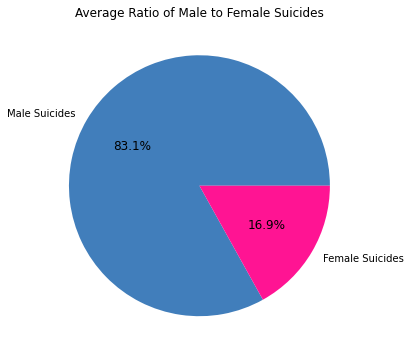

In [8]:
# Read the .csv file into a pandas DataFrame
data = pd.read_csv('databases/FINAL DATASET.csv')

# Extract the required columns
countries = data['Country']
ratio = data['Suicide Ratio (M/F)']


# Remove NaN and negative values from the ratios
ratios = ratio.dropna().replace([-float('inf'), float('inf')], pd.NA).dropna()

# Calculate the average ratio
average_ratio = ratios.mean()

# Calculate the average percentage of the ratio
average_ratio_percentage = average_ratio / (average_ratio + 1) * 100

# Create the pie chart
colors = ['#417EBB', '#FF1493']  # Slightly darker blue represented by '#417EBB

labels = ['Male Suicides', 'Female Suicides']
plt.figure(figsize=(10, 6))
_, _, autotexts = plt.pie([average_ratio_percentage, 100 - average_ratio_percentage], labels=labels, autopct='%1.1f%%', colors=colors)

# Set the color of the percentage values to white
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title('Average Ratio of Male to Female Suicides')

# Display the chart
plt.show()        

This pie chart shows the worldwide average ratio of male to female suicides. The blue area represents the average percentage of male suicides, while the pink area represents the average percentage of female suicides. In this chart you can make out that on average men commit more often suicides than women. 

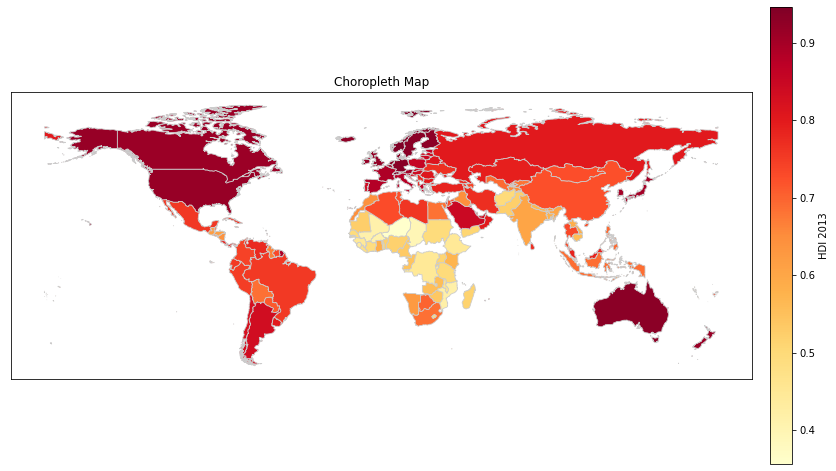

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/HDI_GDI_database_new.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Plot the choropleth map
fig, ax = plt.subplots(figsize=(16, 12))
merged_data.plot(column='HDI 2013', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
plt.title('Choropleth Map')

# Step 7: Add a colorbar for 'HDI 2013'
sm = ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['HDI 2013'])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('HDI 2013')

# Remove the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])

# Display the map
plt.show()


This map shows the HDI in 2013 per country. As shown in the legend, the darker the shade of red, the higher the HDI is. In this map you can clearly see the more developed areas of the world in dark red, such as North America, Western Europe, Eastern Asia and Australia. You can also see the less developed parts of the world as a lighter orange/yellowish shade, Such as Africa, Latin-America and the middle east.

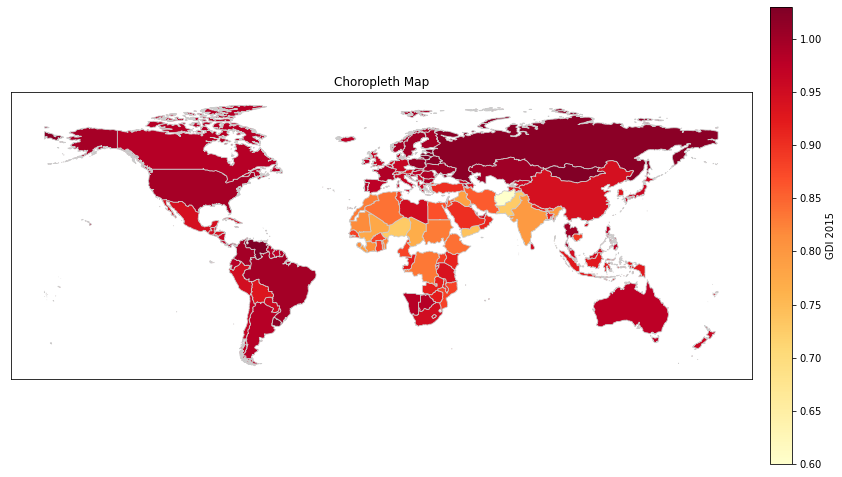

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/IV DATASET 1.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Plot the choropleth map
fig, ax = plt.subplots(figsize=(16, 12))
merged_data.plot(column='GDI 2015', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
plt.title('Choropleth Map')

# Step 7: Add a colorbar for 'HDI 2013'
sm = ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['GDI 2015'])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('GDI 2015')

# Remove the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])

# Display the map
plt.show()


This map shows the GDI in 2015 per country. As shown in the legend, the darker the shade of red, the higher the GDI is. In this map you can see that in most of the world the GDI is relatively high, but there are some parts in the world that have a relatively low GDI, such as India, Afganistan and central/north Africa.

# Description for each of your arguments


- A increase of the HDI will lead to a more balanced gender suicide ratio:
  - A higher HDI means that people have more acces to basic needs such as healthcare, education and employment. If men and woman have equal opportunities for these needs, it can make the gender suicide ratio more balenced.
  - A country with a higher HDI will often have more equal rights for men and women. This can reduce the social pressures and expectations that may contribute to higher suicide rates among a specific gender, for example men, so that the gender suicide ratio is more balenced.